In [30]:
import numpy as np

np.random.seed(42)

In [31]:
import matplotlib.pyplot as plt

def draw_rectangle(start_x, start_y, end_x, end_y, line_color='black', fill_color=None, line_width=1.0):
    rect = plt.Rectangle((start_x, start_y), end_x - start_x, end_y - start_y, edgecolor=line_color, fill=fill_color is not None, linewidth=line_width, facecolor=fill_color)
    plt.gca().add_patch(rect)

def draw_line(start_x, start_y, end_x, end_y, line_color='black', line_width=1.0):
    plt.plot([start_x, end_x], [start_y, end_y], color=line_color, linewidth=line_width)

def draw_circle(center_x, center_y, radius, line_color='black', fill_color=None, line_width=1.0):
    circle = plt.Circle((center_x, center_y), radius, edgecolor=line_color, fill=fill_color is not None, linewidth=line_width, facecolor=fill_color)
    plt.gca().add_patch(circle)

def draw_string(text, x, y, ha, va, color='black', fontsize=12, rotation=0):
    plt.text(x, y, text, fontsize=fontsize, color=color, ha=ha, va=va, rotation=rotation)


In [32]:
def draw_marker(x, min_y, max_y, circle_radius, color):
    draw_line(x, min_y, x, max_y, line_color='black', line_width=0.5)
    draw_circle(x, max_y, circle_radius, line_color='black', fill_color=color, line_width=0.5)

def marker_dim(marker_count, gray_y_max, marker_length=0.02, marker_radius=0.0025):
    radius = marker_radius + np.sqrt(marker_count - 1) * marker_radius
    length = gray_y_max + marker_length + np.sqrt(marker_count - 1) * marker_length
    return radius, length

def draw_fig(limits, protein_limits, markers):
    gray_x_min, gray_x_max = 0.15, 0.85
    gray_y_min, gray_y_max = 0.492, 0.508
    font_size = 12
    text_padding = 0.004
    
    plt.figure(figsize=(20,20))
    colors = ['red', 'green', 'yellow', 'orange', 'purple']

    max_x = max(np.max(limits), np.max(protein_limits), np.max(markers))
    
    # count marker occurrences and remove duplicates
    markers, marker_counts = np.unique(markers, return_counts=True)
    max_marker_count = np.max(marker_counts)
    
    # normalize into [0, 1], leaving some space on the sides
    preprocess = lambda x: (x / max_x) * (gray_x_max - gray_x_min) + gray_x_min
    protein_limits = preprocess(protein_limits)
    limits = preprocess(limits)
    markers = preprocess(markers)
    
    
    # draw the gray bar
    draw_rectangle(gray_x_min, gray_y_min, gray_x_max, gray_y_max, line_color='gray', fill_color='gray', line_width=2.0)
    # x_axis
    x_axis_y = gray_y_min - 0.02
    x_axis_min_x, x_axis_max_x = gray_x_min, gray_x_max
    big_tick_length, small_tick_length = 0.01, 0.005
    draw_line(x_axis_min_x, x_axis_y, x_axis_max_x, x_axis_y, line_color='black', line_width=2.0) # main line
    draw_line(x_axis_min_x, x_axis_y - big_tick_length, x_axis_min_x, x_axis_y, line_color='black', line_width=2.0) # 0 tick
    draw_string("0", x_axis_min_x, x_axis_y - big_tick_length - text_padding, fontsize=font_size, ha='center', va='top')
    draw_line(x_axis_max_x, x_axis_y - big_tick_length, x_axis_max_x, x_axis_y, line_color='black', line_width=2.0) # max tick
    draw_string(str(max_x), x_axis_max_x, x_axis_y - big_tick_length - text_padding, fontsize=font_size, ha='center', va='top')
    
    # y_axis
    y_axis_x = gray_x_min - 0.02
    y_axis_min_y = gray_y_max + 0.01
    _, y_axis_max_y = marker_dim(max_marker_count, gray_y_max)
    draw_line(y_axis_x, y_axis_min_y, y_axis_x, y_axis_max_y, line_color='black', line_width=2.0)
    draw_line(y_axis_x - small_tick_length, y_axis_min_y, y_axis_x, y_axis_min_y, line_color='black', line_width=2.0) # 0 tick
    draw_string("0", y_axis_x - small_tick_length - text_padding, y_axis_min_y, fontsize=font_size, ha='right', va='center')
    draw_line(y_axis_x - small_tick_length, y_axis_max_y, y_axis_x, y_axis_max_y, line_color='black', line_width=2.0) # max tick
    draw_string(str(max_marker_count), y_axis_x - small_tick_length - text_padding, y_axis_max_y, fontsize=font_size, ha='right', va='center')
    draw_string("# Markers", y_axis_x - 0.05, (y_axis_min_y + y_axis_max_y) / 2, fontsize=font_size, ha='center', va='center', rotation=90)
    

    # draw markers
    marker_y_min = gray_y_max
    for marker in markers:
        marker_count = marker_counts[np.where(markers == marker)[0][0]]
        cur_radius, cur_length = marker_dim(marker_count, gray_y_max)
        draw_marker(marker, marker_y_min, cur_length, cur_radius, np.random.choice(colors))
    
    # draw the exons
    exon_y_min, exon_y_max = 0.485, 0.515
    for exon_x_min, exon_x_max in limits:
        draw_rectangle(exon_x_min, exon_y_min, exon_x_max, exon_y_max, line_color='black', fill_color=np.random.choice(colors), line_width=2.0)
        
    # draw the protein
    protein_y_min, protein_y_max = 0.39, 0.43
    light_blue = True
    # iterate over pairs in protein_limits
    for protein_x_min, protein_x_max in [protein_limits[i:i + 2] for i in range(len(protein_limits) - 1)]:
        if light_blue:
            color = 'lightblue'
            light_blue = False
        else:
            color = 'blue'
            light_blue = True
        draw_rectangle(protein_x_min, protein_y_min, protein_x_max, protein_y_max, line_color='black', fill_color=color, line_width=2.0)
    
    plt.xlim(0, 1)
    plt.ylim(0.3, 0.7)
    plt.gca().set_aspect('equal')
    plt.axis('off')
    plt.show()

limits = [
    (65, 398),
    (530, 555),
    (560, 650),
    (653, 730),
    (739, 815),
    (1090, 1345)
]

limits = np.array(limits)
protein_limits = np.sort(np.concatenate((np.array([0]),np.random.randint(0, 1390, 19),np.array([1390]))))
markers = np.concatenate((np.random.randint(0, 1390, 150), np.array([130]*30)))

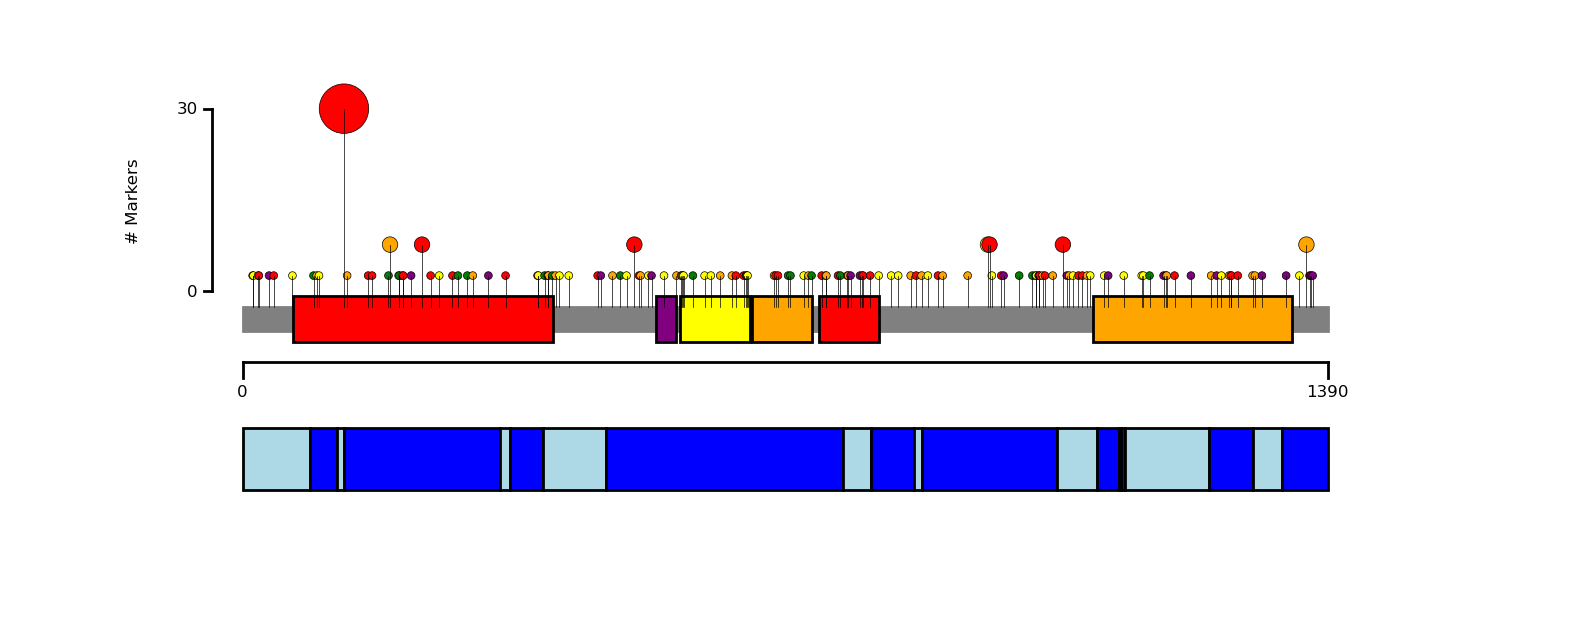

In [33]:
draw_fig(limits, protein_limits, markers)